In [1]:
import numpy as np
import torch
import torch.nn as nn
from PIL import Image
%matplotlib inline
import matplotlib.pyplot as plt

<h1 align="center"> Define constants here </h1>

In [3]:
IMG_ROWS = 32
IMG_COLS = 32
IMG_CHANNELS = 3
IMG_PATH = "images/ship.png"
OUT_IMAG_PATH = "images/ship.txt"
WEIGHT_FOLDER = "weights/"

<h1 align="center">Save image in text file for C++ </h1>

Image Shape :  (32, 32, 3)


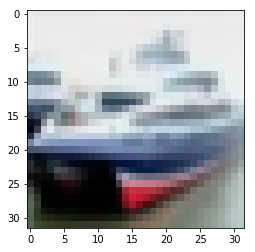

Image Shape after switching channels :  (3, 32, 32)


In [4]:
img = np.array(Image.open(IMG_PATH))
print("Image Shape : ",img.shape)
plt.imshow(img)
plt.show()

img_array = np.stack((img[:,:,0], img[:,:,1], img[:,:,2]))
print("Image Shape after switching channels : ", img_array.shape)

In [5]:
with open(OUT_IMAG_PATH, "w") as outfile:
    
    for channel in range(0, IMG_CHANNELS):
        np.savetxt(outfile, img_array[channel,:,:].flatten(), fmt="%.1f", delimiter='')
    
    print("Conversion Completed Successfully.")

Conversion Completed Successfully.


<h1 align="center"> Define and Load VGG16 weights </h1>

In [6]:
class vgg(nn.Module):
    
    def __init__(self):
        super(vgg, self).__init__()
        
        self.in_shape = IMG_ROWS
        self.in_channels = IMG_CHANNELS
        
        self.layer_names = ["c1","c2","c3","c4","c5","c6","c7","c8","c9","c10","c11","c12","c13","f1","f2","f3"]
        self.c1 = nn.Conv2d(in_channels=self.in_channels, out_channels=64, kernel_size=3, padding=1)
        self.c2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1)
        self.m1 = nn.MaxPool2d(kernel_size=(2,2))
        self.c3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.c4 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1)
        self.m2 = nn.MaxPool2d(kernel_size=(2,2))
        self.c5 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1)
        self.c6 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1)
        self.c7 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1)
        self.m3 = nn.MaxPool2d(kernel_size=(2,2))
        self.c8 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=1)
        self.c9 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
        self.c10 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
        self.m4 = nn.MaxPool2d(kernel_size=(2,2))
        self.c11 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
        self.c12 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
        self.c13 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
        self.m5 = nn.MaxPool2d(kernel_size=(2,2))
        self.f1 = nn.Linear(in_features=512, out_features=512)
        self.f2 = nn.Linear(in_features=512, out_features=512)
        self.f3 = nn.Linear(in_features=512, out_features=10)
        
        self.activation = nn.ReLU()
    
    
    def forward(self, input_, bsize=1):
        
        out = self.activation(self.c1(input_))
        out = self.activation(self.c2(out))
        out = self.m1(out)
        out = self.activation(self.c3(out))
        out = self.activation(self.c4(out))
        out = self.m2(out)
        out = self.activation(self.c5(out))
        out = self.activation(self.c6(out))
        out = self.activation(self.c7(out))
        out = self.m3(out)
        out = self.activation(self.c8(out))
        out = self.activation(self.c9(out))
        out = self.activation(self.c10(out))
        out = self.m4(out)
        out = self.activation(self.c11(out))
        out = self.activation(self.c12(out))
        out = self.activation(self.c13(out))
        out = self.m5(out)
        out = out.view(bsize, -1) # Flatten
        out = self.activation(self.f1(out))
        out = self.activation(self.f2(out))
        out = self.f3(out)
        
        return out

    def save_parameters(self):
        
        self.save_weights(3, 64, 3, self.c1.weight.data.numpy(), self.layer_names[0])
        self.save_bias(64, self.c1.bias.data.numpy(), self.layer_names[0])
        
        self.save_weights(64, 64, 3, self.c2.weight.data.numpy(), self.layer_names[1])
        self.save_bias(64, self.c2.bias.data.numpy(), self.layer_names[1])
        
        self.save_weights(64, 128, 3, self.c3.weight.data.numpy(), self.layer_names[2])
        self.save_bias(128, self.c3.bias.data.numpy(), self.layer_names[2])
        
        self.save_weights(128, 128, 3, self.c4.weight.data.numpy(), self.layer_names[3])
        self.save_bias(128, self.c4.bias.data.numpy(), self.layer_names[3])
        
        self.save_weights(128, 256, 3, self.c5.weight.data.numpy(), self.layer_names[4])
        self.save_bias(256, self.c5.bias.data.numpy(), self.layer_names[4])
        
        self.save_weights(256, 256, 3, self.c6.weight.data.numpy(), self.layer_names[5])
        self.save_bias(256, self.c6.bias.data.numpy(), self.layer_names[5])
        
        self.save_weights(256, 256, 3, self.c7.weight.data.numpy(), self.layer_names[6])
        self.save_bias(256, self.c7.bias.data.numpy(), self.layer_names[6])
        
        self.save_weights(256, 512, 3, self.c8.weight.data.numpy(), self.layer_names[7])
        self.save_bias(512, self.c8.bias.data.numpy(), self.layer_names[7])
        
        self.save_weights(512, 512, 3, self.c9.weight.data.numpy(), self.layer_names[8])
        self.save_bias(512, self.c9.bias.data.numpy(), self.layer_names[8])
        
        self.save_weights(512, 512, 3, self.c10.weight.data.numpy(), self.layer_names[9])
        self.save_bias(512, self.c10.bias.data.numpy(), self.layer_names[9])
        
        self.save_weights(512, 512, 3, self.c11.weight.data.numpy(), self.layer_names[10])
        self.save_bias(512, self.c11.bias.data.numpy(), self.layer_names[10])
        
        self.save_weights(512, 512, 3, self.c12.weight.data.numpy(), self.layer_names[11])
        self.save_bias(512, self.c12.bias.data.numpy(), self.layer_names[11])
        
        self.save_weights(512, 512, 3, self.c13.weight.data.numpy(), self.layer_names[12])
        self.save_bias(512, self.c13.bias.data.numpy(), self.layer_names[12])
        
        self.save_weights_fc(512, 512, self.f1.weight.data.numpy(), self.layer_names[13])
        self.save_bias_fc(512, self.f1.bias.data.numpy(), self.layer_names[13])
        
        self.save_weights_fc(512, 512, self.f2.weight.data.numpy(), self.layer_names[14])
        self.save_bias_fc(512, self.f2.bias.data.numpy(), self.layer_names[14])
        
        self.save_weights_fc(512, 10, self.f3.weight.data.numpy(), self.layer_names[15])
        self.save_bias_fc(10, self.f3.bias.data.numpy(), self.layer_names[15])
        
        

    def save_weights(self, in_channels, out_channels, kernel_size, weight_array, name):
        
        assert weight_array.shape == (out_channels, in_channels, kernel_size, kernel_size)
        with open(WEIGHT_FOLDER+name+"_weights.txt", "w") as outfile:
            for out_channel in range(0, out_channels):
                for in_channel in range(0, in_channels):
                    np.savetxt(outfile, weight_array[out_channel,in_channel, :, :].flatten(), fmt="%f", delimiter='')
    
    def save_weights_fc(self, in_features, out_features, weight_array, name):
        
        assert weight_array.shape == (out_features, in_features)
        with open(WEIGHT_FOLDER+name+"_weights.txt", "w") as outfile:
            for row in range(0, out_features):
                for col in range(0, in_features):
                    np.savetxt(outfile, weight_array[row, col].flatten(), fmt="%f", delimiter="")
    
    def save_bias(self, out_channels, bias_array, name):
        
        assert bias_array.shape == (out_channels, )
        with open(WEIGHT_FOLDER+name+"_bias.txt", "w") as outfile:
            np.savetxt(outfile, bias_array.flatten(), fmt="%f", delimiter='')
    
    def save_bias_fc(self, out_features, bias_array, name):
        
        assert bias_array.shape == (out_features, )
        with open(WEIGHT_FOLDER+name+"_bias.txt", "w") as outfile:
            np.savetxt(outfile, bias_array.flatten(), fmt="%f", delimiter='')

In [7]:
model = vgg()
print(model)

vgg(
  (c1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (c2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (m1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (c3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (c4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (m2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (c5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (c6): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (c7): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (m3): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (c8): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (c9): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (c10): Conv2d(512, 512, kernel_size=

<h1 align="center"> Save Weights </h1>

In [ ]:
model.save_parameters()

In [237]:
torch_in = torch.from_numpy(img_array).float().view(1, IMG_CHANNELS, IMG_ROWS, IMG_COLS)
res = model(torch_in, bsize=1)